## Imports

In [1]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import pickle
# from IPython.display import display, Latex

In [2]:
PATH = os.path.join(os.getcwd(), os.pardir, 'data', 'Chessboard dataset')
# Define the dimensions of the chessboard pattern
chessboard_size = (7, 5)
# Define the criteria for subpixel accuracy
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare the object points
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

# Define the arrays to store the object points and image points
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

images = glob.glob(os.path.join(PATH, '*.jpg'))

## Part 1

In [3]:
# This code calibrates a camera using a set of images of a chessboard pattern.
# The camera matrix and distortion coefficients are calculated.
# We then draw the corners of the chessboard pattern on the image and display them.

# Find the chessboard corners in each image
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        cv2.imshow('image', img)
        cv2.waitKey(300)

cv2.destroyAllWindows()

# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1])

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        cv2.imshow('image', img)
        cv2.waitKey(300)

cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1])

print(f'Focal length (fx, fy): {mtx[0, 0]}, {mtx[1, 1]}')
print(f'Skew parameter: {mtx[0, 1]}')
print(f'Principal point (cx, cy): {mtx[0, 2]}, {mtx[1, 2]}')
print(f'Error estimates: {ret}')
print(f'Camera matrix: \n{mtx}')

Focal length (fx, fy): 1585.9978576532808, 1608.0433498341943
Skew parameter: 0.0
Principal point (cx, cy): 464.1850785281408, 384.67480518464845
Error estimates: 1.2935252540053748
Camera matrix: 
[[1.58599786e+03 0.00000000e+00 4.64185079e+02]
 [0.00000000e+00 1.60804335e+03 3.84674805e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
# camera_params = {'ret': ret, 'mtx': mtx, 'dist': dist, 'rvecs': rvecs, 'tvecs': tvecs}
# with open('camera_params.pickle', 'wb') as file:
#     pickle.dump(camera_params, file)

In [ ]:
# with open('camera_params.pickle', 'rb') as file:
#     camera_params = pickle.load(file)

# ret = camera_params['ret']
# mtx = camera_params['mtx']
# dist = camera_params['dist']
# rvecs = camera_params['rvecs']
# tvecs = camera_params['tvecs']

## Part 2

In [6]:
R = np.zeros((len(rvecs), 3, 3))
for i in range(len(rvecs)):
    R[i] = cv2.Rodrigues(rvecs[i])[0]

print(f'Rotation matrix: \n{R}')

print(f'Translation vector: \n{tvecs}')

Rotation matrix: 
[[[ 0.0090259  -0.99502485  0.09921732]
  [ 0.98946038  0.02322734  0.14292879]
  [-0.14452226  0.09688155  0.98474732]]

 [[ 0.7782305  -0.61764118  0.11347541]
  [ 0.62787207  0.76195918 -0.15872894]
  [ 0.0115739   0.19477574  0.98077951]]

 [[ 0.06863486 -0.99537403 -0.06722948]
  [ 0.84022143  0.0213407   0.54182333]
  [-0.53788215 -0.09367562  0.8377993 ]]

 [[-0.05167293  0.99575697 -0.07614434]
  [-0.76484807  0.00956624  0.64413967]
  [ 0.64213498  0.09152344  0.76110848]]

 [[ 0.0160214  -0.99029722  0.13803888]
  [ 0.99351719  0.03130704  0.10928614]
  [-0.11254735  0.13539308  0.98437889]]

 [[ 0.01412042 -0.9690022   0.24664823]
  [ 0.99382201  0.04075827  0.10323073]
  [-0.11008376  0.24366678  0.96359123]]

 [[-0.04633794  0.99488788 -0.08972686]
  [-0.93327048 -0.01109031  0.35900308]
  [ 0.35617271  0.10037489  0.92901339]]

 [[-0.00494697  0.99870395 -0.05065527]
  [-0.99183171  0.00155623  0.12754384]
  [ 0.12745737  0.05087245  0.99053855]]

 [[ 0.

## Part 3

In [11]:
print("Estimated radial distortion coefficients:")
print(dist)

raw_images = ['01', '02', '03', '04', '05']
for i in raw_images:

    img = cv2.imread(glob.glob(os.path.join(PATH, f'*{i}.jpg'))[0])
    undistorted = cv2.undistort(img, mtx, dist)
    
    cv2.imshow('Original', img)
    cv2.imshow('Undistorted', undistorted)
    cv2.waitKey(0)
cv2.destroyAllWindows()

Estimated radial distortion coefficients:
[[-6.76836219e-01  1.88298296e+02 -7.18976449e-03 -1.75536209e-02
  -7.41656354e+03]]


## Part 4

In [8]:
mean_error = 0
errors = []
for i in range(len(objpoints)):

    # Find the error of the image points by projecting the object points with the 
    # rotation and translation vectors and comparing the result to the image points.
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    # error = np.sqrt(np.sum((imgpoints[i] - imgpoints2)**2) / len(imgpoints2))

    errors.append(error)
    mean_error += error
    print(f'Re-projection error for image {i+1}: {error}')

Re-projection error for image 1: 0.240410675963352
Re-projection error for image 2: 0.2689949617867901
Re-projection error for image 3: 0.17838973764647148
Re-projection error for image 4: 0.19034773967119412
Re-projection error for image 5: 0.19094831801568377
Re-projection error for image 6: 0.19024696948589007
Re-projection error for image 7: 0.18399398628730898
Re-projection error for image 8: 0.22088312890584746
Re-projection error for image 9: 0.31024090386207304
Re-projection error for image 10: 0.19875821365068577
Re-projection error for image 11: 0.20814376054769226
Re-projection error for image 12: 0.1740334708419684
Re-projection error for image 13: 0.27822447256220517
Re-projection error for image 14: 0.18981729719052287
Re-projection error for image 15: 0.09585468472791889
Re-projection error for image 16: 0.20117175096230624
Re-projection error for image 17: 0.1783180307806425
Re-projection error for image 18: 0.11575969638691193
Re-projection error for image 19: 0.260094

Mean re-projection error: 0.20818319038316221
Standard deviation of re-projection error: 0.06682610698001613


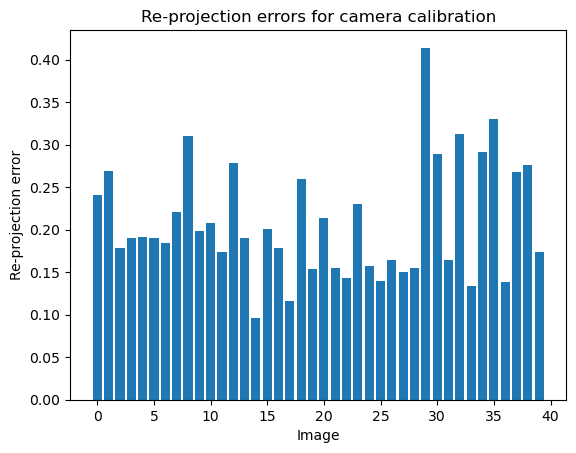

In [7]:
mean_error /= len(objpoints)
std_error = np.std(errors)
print(f'Mean re-projection error: {mean_error}')
print(f'Standard deviation of re-projection error: {std_error}')

plt.figure()
plt.bar(range(len(errors)), errors)
plt.xlabel('Image')
plt.ylabel('Re-projection error')
plt.title('Re-projection errors for camera calibration')
plt.show()

## Part 5

In [12]:
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)
    
    if ret == True:
                
        cv2.drawChessboardCorners(img, chessboard_size, corners, bool(ret))
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1])
        imgpoints2, _ = cv2.projectPoints(objp, rvecs[0], tvecs[0], mtx, dist)
        
        cv2.drawChessboardCorners(img, chessboard_size, imgpoints2, bool(ret))
        
        # Plot the results
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Detected corners')
        axs[0].plot(corners[:, 0, 0], corners[:, 0, 1], 'ro')
        axs[0].set_xticks([])
        axs[0].set_yticks([])
        
        axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[1].set_title('Re-projected corners')
        axs[1].plot(imgpoints2[:, 0, 0], imgpoints2[:, 0, 1], 'bo')
        axs[1].set_xticks([])
        axs[1].set_yticks([])
        plt.show()

## Part 6

In [13]:
# This code is used to find the normal vector to the checkerboard's plane in the camera frame
# for each image in the list of images.

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)
    
    if ret == True:
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1])
        R = cv2.Rodrigues(rvecs[0])[0]
        R = np.linalg.inv(R)
        n_c = np.dot(R, [0, 0, 1])
        
        print(f'Image {i+1}: n^c = {n_c}')
        # display(Latex(f'Image {i+1}: $n^c$ = {n_c}'))

Image 1: n^c = [-0.00102107  0.09818135  0.99516802]
Image 2: n^c = [0.02378546 0.24824007 0.96840648]
Image 3: n^c = [-0.47586008 -0.11065179  0.87253273]
Image 4: n^c = [0.70816766 0.12647686 0.69462376]
Image 5: n^c = [0.03433349 0.21189469 0.97668923]
Image 6: n^c = [0.01714443 0.09080262 0.99572132]
Image 7: n^c = [0.24385889 0.09000053 0.96562557]
Image 8: n^c = [-1.39596728e-04  3.38277253e-02  9.99427669e-01]
Image 9: n^c = [0.0014038  0.3457657  0.93831983]
Image 10: n^c = [0.00486025 0.30518431 0.9522809 ]
Image 11: n^c = [-0.0392609   0.51188367  0.85815715]
Image 12: n^c = [-0.57983868  0.06111808  0.81243565]
Image 13: n^c = [ 0.02231294 -0.29466986  0.95533858]
Image 14: n^c = [ 0.62429256 -0.06507576  0.7784754 ]
Image 15: n^c = [-0.23644186 -0.18107596  0.95462388]
Image 16: n^c = [ 0.22148116 -0.00248921  0.97516147]
Image 17: n^c = [ 0.10185024 -0.0948747   0.99026528]
Image 18: n^c = [-0.13704048  0.10731525  0.98473516]
Image 19: n^c = [ 0.46828562 -0.26641456  0.84